<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CST3512/blob/main/CST3512_Class20_Combining_Merging_Sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CST3512 Class 20
**Combining and Merging Datasets**   

This notebook is based on [Section 8.2 Combining and Merging Datasets](https://wesmckinney.com/book/data-wrangling.html#prep_merge_join) from Chapter 8 - Data Wrangling: Join, Combine, and Reshape in Wes Mckinney's 'Python for Data Analysis'   
    
    
*Some of Wes McKinney's examples have been adapted to use more mnemonic variable names.*       



**This notebook has two main sections:**    

1. Section 8.2 Concepts and Examples from Wes McKinney     

2. Exercises Using Two Datasets of U.S. City Data (geo and population)     

* plus, a reference to other, related exercises     


Data contained in pandas objects can be combined together in a number of ways:

`pandas.merge` connects rows in DataFrames based on one or more keys. This will be familiar to users of SQL or other relational databases, as it implements database join operations.

`pandas.concat` concatenates or "stacks" together objects along an axis.

The `combine_first` instance method enables splicing together overlapping data to fill in missing values in one object with values from another.

`pandas.merge_asof` allows you to do time series-based "window" joins between DataFrame objects. This will be discussed in more detail in Time Series

Mckinney addresses each of these and gives a number of examples. They will be utilized in examples throughout the remainder of the Data Analysis with Python book.



---



###**Housekeeping**    

Import required modules    


In [1]:
# Import pandas 
import pandas as pd

# Import numpy   
import numpy as np


##Mckinney 8.2 on Merging and Combining Dataframes      



---



###Database-Style Dataframe Joins    

*Merge* or *join* operations combine datasets by linking rows using one or more keys. These operations are particularly important in relational databases (e.g., SQL-based). The `merge` function in pandas is the main entry point for using these algorithms on your data.

Let’s start with a simple example:

In [ ]:
df1 = pd.DataFrame({'fruit': ['banana', 'banana', 'apple', 'cherry', 'apple', 'apple', 'banana'],
                    'data1': range(7)})

df2 = pd.DataFrame({'fruit': ['apple', 'banana', 'date'],
                    'data2': range(3)})


In [ ]:
# print(df1.describe())
print()
print(df1)

In [ ]:
# print(df2.describe())
print()
print(df2)

The following is an example of a *many-to-one join*; the data in `df1` has multiple rows labeled `a` and `b`, whereas `df2` has only one row for each value in the key column. Calling `merge` with these objects we obtain:

In [ ]:
pd.merge(df1, df2)

Note that the last snippet of code DID NOT specify which column to join on. If that information is not specified, `merge` uses the overlapping column names as the keys. It’s a good practice to specify explicitly, though:

In [ ]:
pd.merge(df1, df2, on='fruit')

If the column names are different in each object, you can specify them separately:

In [ ]:
df3 = pd.DataFrame({'fruit': ['banana', 'banana', 'apple', 'cherry', 'apple', 'apple', 'banana'],
                    'data3': range(7)}) 

df4 = pd.DataFrame({'tree': ['apple', 'banana', 'date'],
                    'data4': range(3)})

In [ ]:
# print(df3.describe())
print()
print(df3)

In [ ]:
# print(df4.describe())
print()
print(df4)

In [ ]:
pd.merge(df3, df4, left_on='fruit', right_on='tree')

You may notice that the 'c' and 'd' values and associated data are missing from the result. By default `merge` does an 'inner' join; the keys in the result are the intersection, or the common set found in both tables. Other possible options are 'left', 'right', and 'outer'. The *outer join* takes the union of the keys, combining the effect of applying both *left* and *right joins*:

In [ ]:
print(df1)
print(df2)

In [ ]:
pd.merge(df1, df2, how='outer')

A `left` join:

In [ ]:
pd.merge(df1, df2, how='left')

A 'right` join:    

In [ ]:
pd.merge(df1, df2, how='right')

What if we switch the order of the dataframes in that right-join  `.merge()`?    
    
 * Will we have a row for 'cherry'?    
 * Will we have a row for 'date'?    


In [ ]:
pd.merge(df2, df1, how='right')

See the following **Table 8.1** for a summary of the options for how different *joins* are treated.

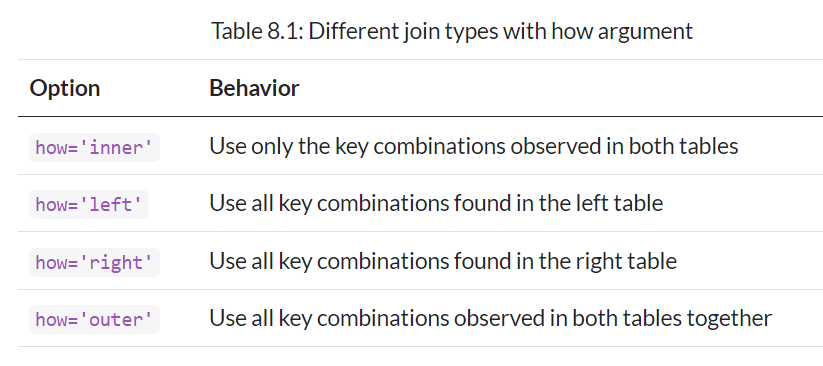

*Many-to-many* merges form the Cartesian product of the matching keys. Here’s an example:

In [ ]:
df5 = pd.DataFrame({'key': ['banana', 'banana', 'apple', 'cherry', 'apple', 'banana'],
                    'data5': range(6)})

df6 = pd.DataFrame({'key': ['apple', 'banana', 'apple', 'banana', 'date'],
                    'data6': range(5)}) 


In [ ]:
# print(df5.describe())
print()
print(df5)

In [ ]:
# print(df6.describe())
print()
print(df6)

In [ ]:
pd.merge(df5, df6, on='key', how='left')

Since there were three 'b' rows in the left DataFrame and two in the right one, there are six 'b' rows in the result. The `join` method only affects the distinct key values appearing in the result:

In [ ]:
pd.merge(df5, df6, how='inner')

To `merge` with multiple keys, pass a list of column names:


In [ ]:
df_left = pd.DataFrame({'cave': ['foo', 'foo', 'bar'],
                     'fish': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
 
df_right = pd.DataFrame({'cave': ['foo', 'foo', 'bar', 'bar'],
                      'fish': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})


In [ ]:
# print(df_left.describe())
print()
print(df_left)

In [ ]:
# print(df_right.describe())
print()
print(df_right)

In [ ]:
pd.merge(df_left, df_right, on=['cave', 'fish'], how='outer')

To determine which key combinations will appear in the result depending on the choice of merge method, think of the multiple keys as forming an array of tuples to be used as a single join key.

***Caution***    


*When you're joining columns-on-columns, the indices on the passed DataFrame objects are discarded.*

A last issue to consider in `merge` operations is the treatment of overlapping column names. While you can address the overlap manually (see the earlier section on renaming axis labels), `merge` has a `suffixes` option for specifying strings to append to overlapping names in the *left* and *right* DataFrame objects:

In [ ]:
print(df_left)
print(df_right)

In [ ]:
pd.merge(df_left, df_right, on='cave')

In [ ]:
pd.merge(df_left, df_right, on='cave', suffixes=('_left', '_right'))

Let's try that with dataframes that have more than one redundant column

In [ ]:
df_left = pd.DataFrame({'cave': ['foo', 'foo', 'bar'],
                     'fish': ['one', 'two', 'one'],
                     'fruit' : ['apple', 'banana', 'apple'],
                     'lval': [1, 2, 3]})
 
df_right = pd.DataFrame({'cave': ['foo', 'foo', 'bar', 'bar'],
                      'fish': ['one', 'one', 'one', 'two'],
                      'fruit' : ['apple', 'banana', 'date', 'cherry'],
                      'rval': [4, 5, 6, 7]})


In [ ]:
print(df_left)
print(df_right)

In [ ]:
pd.merge(df_left, df_right, on='cave', suffixes=('_left', '_right'))



---



See **Table 8.2** for an argument reference on merge. Joining using the DataFrame's row index is the subject of the next section.

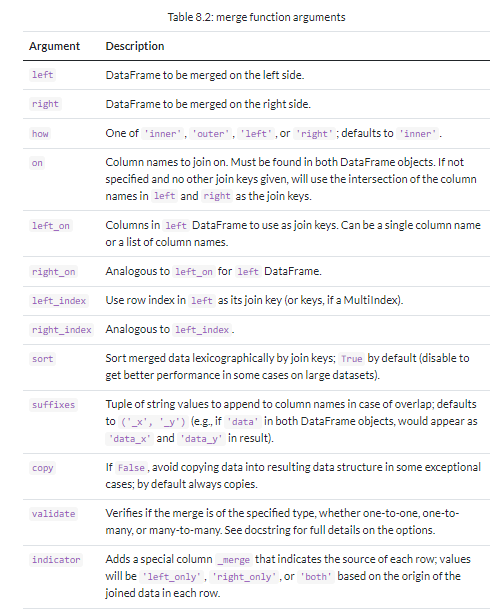



---



###Merging on Index    

In some cases, the `merge` key(s) in a DataFrame will be found in its index (row labels). In this case, you can pass `left_index=True` or `right_index=True` (or both) to indicate that the index should be used as the merge key:

In [13]:
df_left1 = pd.DataFrame({'fruit': ['apple', 'banana', 'apple', 'apple', 'banana', 'cherry'],
                         'value': range(6)})

df_right1 = pd.DataFrame({'group_val': [3.5, 7, 1000]}, index=['apple', 'banana', 'date'])

In [ ]:
# print(df_left1.describe())
print()
print(df_left1)

In [ ]:
# print(df_right1.describe())
print()
print(df_right1)

In [ ]:
pd.merge(df_left1, df_right1, left_on='fruit', right_index=True)

Since the default `merge` method is to intersect the join keys, you can instead form the *union* of them with an *outer join*:

In [ ]:
pd.merge(df_left1, df_right1, left_on='fruit', right_index=True, how='outer')

With hierarchically indexed data, things are more complicated, as joining on index is equivalent to a multiple-key merge:

In [2]:
df_lefth = pd.DataFrame({'state': ['Ohio', 'Ohio', 'Ohio',
                                  'Nevada', 'Nevada'],
                         'year': [2000, 2001, 2002, 2001, 2002],
                         'data': np.arange(5.)})

In [3]:
df_righth = pd.DataFrame(np.arange(12).reshape((6, 2)),
                         index=[['Nevada', 'Nevada', 'Ohio', 'Ohio',
                                 'Ohio', 'Ohio'],
                               [2001, 2000, 2000, 2000, 2001, 2002]],
                         columns=['event1', 'event2'])

In [ ]:
# print(df_lefth.describe())
print()
print(df_lefth)

In [ ]:
# print(df_righth.describe())
print()
print(df_righth)

In this case, you have to indicate multiple columns to `merge` on as a list (note the handling of duplicate index values with `how='outer'`):

In [ ]:
pd.merge(df_lefth, df_righth, left_on=['state', 'year'], right_index=True)

In [ ]:
pd.merge(df_lefth, df_righth, left_on=['state', 'year'],
         right_index=True, how='outer')

Using the indexes of both sides of the `merge` is also possible:

In [7]:
df_left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                         index=['apple', 'cherry', 'elderberry'],
                         columns=['Ohio', 'Nevada'])

In [8]:
df_right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                          index=['banana', 'cherry', 'date', 'elderberry'],
                          columns=['Missouri', 'Alabama'])

In [ ]:
# print(df_left2.describe())
print()
print(df_left2)

In [ ]:
# print(df_right2.describe())
print()
print(df_right2)

In [ ]:
pd.merge(df_left2, df_right2, how='outer', left_index=True, right_index=True)

... or, as an *inner join*:

In [ ]:
pd.merge(df_left2, df_right2, how='inner', left_index=True, right_index=True)

DataFrame has a `join` instance method to simplify *merging* by index. It can also be used to *combine* together many DataFrame objects having the same or similar indexes but non-overlapping columns. In the prior example, we could have written:

In [ ]:
df_left2.join(df_right2, how='outer')

Compared with `pandas.merge`, DataFrame’s `join` method performs a *left join* on the *join keys*, exactly preserving the left frame's row index. It also supports *joining* the index of the passed DataFrame on one of the columns of the calling DataFrame:

In [ ]:
# print(df_left1.describe())
# print()
print(df_left1)

In [ ]:
# print(df_right1.describe())
# print()
print(df_right1)

In [ ]:
df_left1.join(df_right1, on='fruit')

You can think of this method as *joining* data **"into"** the object whose `join` method is invoked.

Lastly, for simple *index-on-index merges*, you can pass a list of DataFrames to `join` as an alternative to using the more general `concat` function described in the next section:

In [ ]:
df_another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                           index=['apple', 'cherry', 'elderberry', 'fig'],
                           columns=['New York', 'Oregon'])

In [ ]:
print(df_right2)

In [ ]:
# print(df_another.describe())
print()
print(df_another)

In [ ]:
df_left2.join([df_right2, df_another])

In [ ]:
df_left2.join([df_right2, df_another], how='outer')



---



###Concatenating Along an Axis    

Another kind of data combination operation is referred to interchangeably as concatenation or stacking.     

NumPy's `concatenate` function can do this with NumPy arrays:

In [ ]:
ar_arr = np.arange(12).reshape((3, 4))

In [ ]:
print(ar_arr.shape)
print()
print(ar_arr)

In [ ]:
print(np.concatenate([ar_arr, ar_arr], axis=1).shape)
print()
print(np.concatenate([ar_arr, ar_arr], axis=1))

In the context of pandas objects such as Series and DataFrame, having labeled axes enable you to further generalize array concatenation. In particular, you have a number of additional concerns:    

* If the objects are indexed differently on the other axes, should we combine the distinct elements in these axes or use only the values in common.?    

* Do the concatenated chunks of data need to be identifiable as such in the resulting object?

* Does the "concatenation axis" contain data that needs to be preserved? In many cases, the default integer labels in a DataFrame are best discarded during concatenation.    

The `concat` function in pandas provides a consistent way to address each of these questions. Several examples illustrate how it works.     

Suppose we have three Series with no index overlap:     

 

In [17]:
se_s1 = pd.Series([0, 1], index=['apple', 'banana'])

se_s2 = pd.Series([2, 3, 4], index=['cherry', 'date', 'elderberry'])

se_s3 = pd.Series([5, 6], index=['fig', 'grape'])

In [ ]:
print(se_s1)
print()
print(se_s2)
print()
print(se_s3)
print()

Calling `concat` with these objects in a list glues together the values and indexes:

In [ ]:
pd.concat([se_s1, se_s2, se_s3])

By default `concat` works along `axis=0`, producing another Series. If you pass `axis=1`, the result will instead be a DataFrame (`axis=1` is the columns):

In [ ]:
pd.concat([se_s1, se_s2, se_s3], axis=1)

In this case there is no overlap on the other `axis`, which as you can see is the sorted union (the 'outer' join) of the indexes. You can instead intersect them by passing `join='inner'`:

In [ ]:
se_s4 = pd.concat([se_s1, se_s3])

In [ ]:
print(se_s1)

In [ ]:
print(se_s4)
print()

In [ ]:
pd.concat([se_s1, se_s4], axis=1)

In [ ]:
pd.concat([se_s1, se_s4], axis=1, join='inner')

In this last example, the 'f' and 'g' labels disappeared because of the `join='inner'` option.

A potential issue is that the concatenated pieces are not identifiable in the result. Suppose instead you wanted to create a hierarchical index on the concatenation axis. To do this, use the `keys` argument:

In [ ]:
df_result = pd.concat([se_s1, se_s1, se_s3], keys=['one', 'two', 'three'])

In [ ]:
# print(df_result.describe())
print()
print(df_result)

... then try to `unstack` the dataframe to create columns from the second index in the row hierarchical index.

In [ ]:
df_result.unstack()

In the case of *combining* Series along `axis=1`, the keys become the DataFrame column headers:

In [ ]:
pd.concat([se_s1, se_s2, se_s3], axis=1, keys=['one', 'two', 'three'])

The same logic extends to DataFrame objects:

In [ ]:
df_df7 = pd.DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                      columns=['one', 'two'])

In [ ]:
df_df8 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                      columns=['three', 'four'])

In [ ]:
# print(df_df7.describe())
print()
print(df_df7)

In [ ]:
# print(df_df8.describe())
print()
print(df_df8)

In [ ]:
# pd.concat([df_df7, df_df8], axis=1, keys=['level1', 'level2'])
pd.concat([df_df7, df_df8], axis=1, keys=['OWID', 'UN'])


Here the `keys` argument is used to create a hierarchical index where the first level can be used to identify each of the *concatenated* DataFrame objects.

If you pass a *dict* of objects instead of a list, the dict’s *keys* will be used for the `keys` option:

In [ ]:
# pd.concat({'level1': df_df7, 'level2': df_df8}, axis=1) 
pd.concat({'OWID': df_df7, 'UN': df_df8}, axis=1)

There are additional arguments governing how the hierarchical index is created (see **Table 8.3**). For example, we can name the created *axis levels* with the `names` argument:

In [ ]:
# pd.concat([df_df7, df_df8], axis=1, keys=['level1', 'level2'],
#           names=['upper', 'lower'])
pd.concat([df_df7, df_df8], axis=1, keys=['OWID', 'UN'],
           names=['source:', 'location:'])

A last consideration concerns DataFrames in which the *row index* does not contain any relevant data:

In [ ]:
df_df09 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])

In [ ]:
df_df10 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

In [ ]:
# print(df_df3.describe())
print()
print(df_df09)

In [ ]:
# print(df_df4.describe())
print()
print(df_df10)

In this case, you can pass `ignore_index=True`:

In [ ]:
pd.concat([df_df09, df_df10], ignore_index=True)

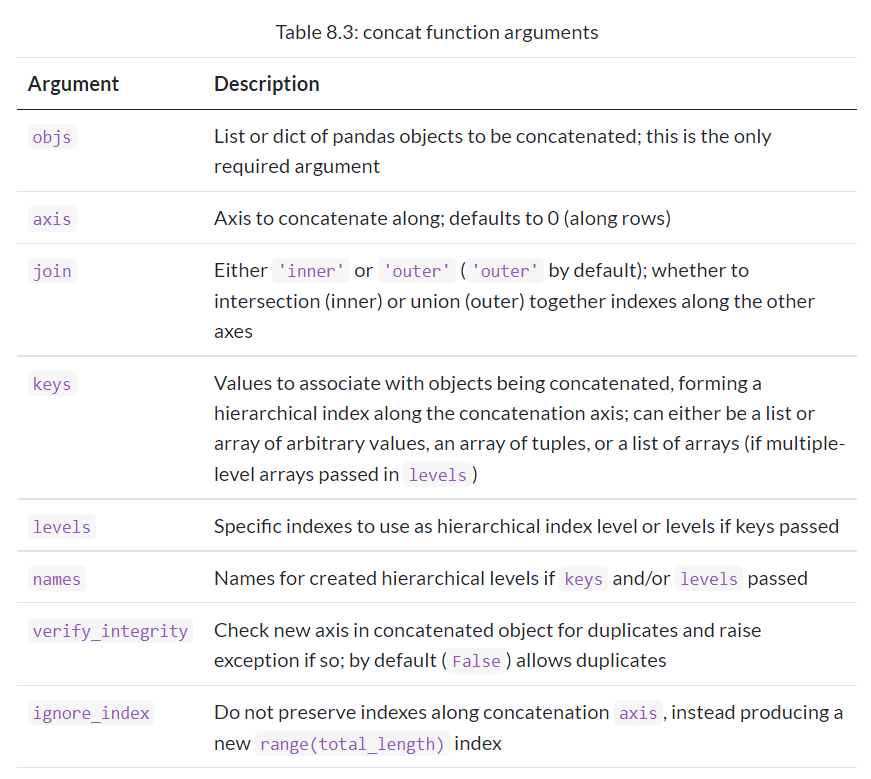

###Combining Data with Overlap    

There is another data combination situation that can’t be expressed as either a `merge` or `concatenation` operation. You may have two datasets whose indexes overlap in full or part. As a motivating example, consider NumPy’s `where` function, which performs the array-oriented equivalent of an *if-else* expression:

In [20]:
se_a = pd.Series([np.nan, 2.5, 0.0, 3.5, 4.5, np.nan],
                  index=['fig', 'elderberry', 'date', 'cherry', 'banana', 'apple'])

se_b = pd.Series([0., np.nan, 2., np.nan, np.nan, 5.],
                  index=['apple', 'banana', 'cherry', 'date', 'elderberry', 'fig'])

In [ ]:
print(se_a)
print()
print(se_b)

See [Numpy documentation on `where`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) for details.

In [21]:
# Using `where` to test a condition (arg1) and provide a value if True (arg2)
# ... othewise, provide an alternate value (arg3) if arg1 is False
np.where(pd.isna(se_a), se_b, se_a)

array([0. , 2.5, 0. , 3.5, 4.5, 5. ])

Here, whenever values in `se_a` are null, values from `se_b` are selected, otherwise the non-null values from a are selected. Using `np.where` does not check whether the index labels are aligned or not, so if you want to line up values by `index`, use the Series `combine_first` method:

In [ ]:
se_a.combine_first(se_b)

With DataFrames, `combine_first` does the same thing column by column, so you can think of it as “patching” missing data in the calling object with data from the object you pass:

In [22]:
df_df11 = pd.DataFrame({'apple': [1., np.nan, 5., np.nan],
                       'banana': [np.nan, 2., np.nan, 6.],
                       'cherry': range(2, 18, 4)})

df_df12 = pd.DataFrame({'apple': [5., 4., np.nan, 3., 7.],
                       'banana': [np.nan, 3., 4., 6., 8.]})

In [ ]:
# print(df_df10.describe())
print()
print(df_df11)

In [ ]:
# print(df_df12.describe())
print()
print(df_df12)

In [ ]:
df_df11.combine_first(df_df12)



---



##Excercises with Two City Datasets (geo and population)    

Use a 10-minute breakout session to review the assigned section of this exercise and prepare a 3-5 minute presentation to the class on the subject of the exercise assigned.  
    
> <b><u>Two-City Exercise Assignments</u></b>    
    
---
| Number | Topic | Assigned |    
|--- |--- | --- |     
| 1. | Inner Join | Syed Hussain |    
| 1. | Inner Join | Mustafa Mozeb |    
| 2. | Outer Join | Hudda Siddique |    
| 2. | Outer Join | Rudoplhe Uriel Susana Thyma |    
| 3. | Join on Indices | John Vestal |
| 3. | Join on Indices | Tyler Walker |    
| 3. | Join on Indices | Rex Wong |    
    

##Fetch Data Files    

####Fetch a SAMPLE `csv` file of cities/states and their latitude/longitude into a dataframe 

In [ ]:
!curl "https://raw.githubusercontent.com/ProfessorPatrickSlatraigh/data/main/cities_lat-dd_lon-dd.csv" -o cities_lat-dd_lon-dd.csv   

####Fetch a `csv` file of largest U.S. cities/states and their populations into a dataframe 

In [ ]:
!curl "https://raw.githubusercontent.com/ProfessorPatrickSlatraigh/data/main/cities-pop_2020-2022.csv" -o cities-pop_2020_2022.csv   

---

###Load Dataframes    

####Load a SAMPLE `csv` file of N.A. cities/states and their latitude/longitude into a dataframe 

In [ ]:
cities_geo_df = pd.read_csv('cities_lat-dd_lon-dd.csv')

In [ ]:
cities_geo_df.dtypes

In [ ]:
cities_geo_df

####Load a `csv` file of largest U.S. cities/states and their populations into a dataframe 

In [ ]:
cities_pop_df = pd.read_csv('cities-pop_2020_2022.csv')

In [ ]:
cities_pop_df.dtypes

In [ ]:
cities_pop_df

---

###Combine Exercises    

####1. Merge (inner join) on named columns    

In [ ]:
city_merge_inner = pd.merge(cities_geo_df, cities_pop_df, left_on='city', right_on='city')

In [ ]:
city_merge_inner

*Some `city` names are redundant across states.  A more reliable `merge` would use both `state` and `city` as keys.*

In [ ]:
# merging on a list of key column names    
city_merge_inner = pd.merge(cities_geo_df, cities_pop_df, on=['state', 'city'])

In [ ]:
city_merge_inner

####2. Merge (outer join) on named columns    

In [ ]:
city_merge_outer = pd.merge(cities_geo_df, cities_pop_df, left_on='city', right_on='city', how='outer')

In [ ]:
city_merge_outer

*Refining that for `city` names which may be redundant across states, we construct a more reliable `merge` woul using both `state` and `city` as keys.*

In [ ]:
city_merge_outer = pd.merge(cities_geo_df, cities_pop_df, on=['state', 'city'], how='outer')

In [ ]:
city_merge_outer

####3. Merge (inner join) on index/indices    

Let's create hierarchical row indices for each of the city dataframes.

In [ ]:
geo_df = cities_geo_df.set_index(['state', 'city'])

In [ ]:
geo_df

In [ ]:
pop_df = cities_pop_df.set_index(['state', 'city'])

In [ ]:
pop_df

#####3.a Merge (inner join) the `geo_df` with the `pop_df` based on their indices.

In [ ]:
merge_inner = pd.merge(geo_df, pop_df, left_index=True, right_index=True)

In [ ]:
merge_inner

If one dataframe had keys in columns, not the indices but it is being merged with like keys in the other dataframe.

In [ ]:
mixed_merge_inner = pd.merge(cities_geo_df, pop_df, left_on=['state', 'city'], right_index=True)

In [ ]:
mixed_merge_inner

In [ ]:
mixed_merge_inner = pd.merge(geo_df, cities_pop_df, left_index=True, right_on=['state', 'city'])

In [ ]:
mixed_merge_inner

#####3.b Merge (outer join) the `geo_df` with the `pop_df` based on their indices.

In [ ]:
merge_outer = pd.merge(geo_df, pop_df, left_index=True, right_index=True, how='outer')

In [ ]:
merge_outer

If one dataframe had keys in columns, not the indices but it is being merged with like keys in the other dataframe.

In [ ]:
mixed_merge_outer = pd.merge(geo_df, pop_df, left_index=True, right_on=['state', 'city'])

#####3.c Using `join` on index/indices    

**An inner `.join()` on index/indices** 

In [ ]:
joined_inner = geo_df.join(pop_df)

In [ ]:
joined_inner

**An outer `.join()` on index/indices** 

In [ ]:
joined_outer = geo_df.join(pop_df, how='outer')

In [ ]:
joined_outer

---


#<b> o Related Exercise</b>


*See the tutorial ['Using Pandas with Large Datasets in Python' -- on dataquest.io](https://www.dataquest.io/blog/pandas-big-data/) for performance considerations when working with large datasets in Python.* 



---

